In [2]:
import numpy as np
import matplotlib.pyplot as matplot
import math

from numpy.lib.shape_base import expand_dims

print ("Import Complete")

Import Complete


In [3]:
#Initialisation Loop is here

d_time = 1.5625e-12

current_time = 0 #start_time
current_phase =0.5
current_amplitude = 1

Signal_Freq = 500000000 #signal frequency

StopTime = 1.4e-8 #end_time

sine_array = []
time_array = []

print("Initialisation complete")

while ( current_time < StopTime ) :

    temp = math.sin ( 2* math.pi * current_time * Signal_Freq + current_phase )
    current_time = current_time + d_time


    sine_array.append (temp)
    time_array.append (current_time)
    

Initialisation complete


Unmodulated Sine Signal


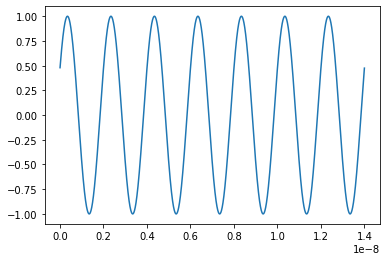

In [4]:
#plotting sine wave that was created

print("Unmodulated Sine Signal")
matplot.plot(time_array,sine_array) 

Total Iterations Ran:  8960
Modulated Signal


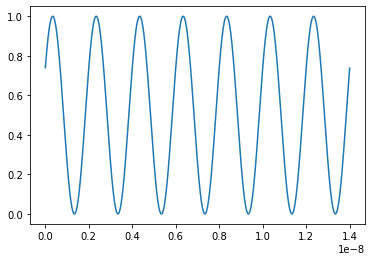

In [5]:
#Modulating the signal using MZ modulator

current_time = 0

current_itr = 0

mod_signal_array = []

while ( current_time < StopTime ):

    signal_temp = sine_array[ current_itr ]
    signal_temp = signal_temp/2
    signal_temp = (signal_temp + 0.5)
    mod_signal_array.append ( signal_temp )
    current_itr = current_itr + 1
    current_time = current_time + d_time

print("Total Iterations Ran: " , current_itr)
print("Modulated Signal")

total_iterations = current_itr

matplot.plot ( time_array, mod_signal_array )

In [6]:
#Inverse Calculation testing

freq_const = 2 * math.pi * Signal_Freq

signal_temp = mod_signal_array[1] - 0.5
signal_temp = signal_temp * 2

signal_temp = math.asin ( signal_temp )
temp_phase  = signal_temp - ( freq_const * d_time )

print( temp_phase )

0.5


In [7]:
#Testing Gaussian Function

from filterpy.stats import gaussian

xs = np.arange(15, 30, 0.05)
matplot.plot(xs, gaussian(xs, 20, 2))



ModuleNotFoundError: No module named 'filterpy'

In [8]:
#Test Load Mat Component


import scipy.io as sio


print("Scipy loaded successfully")

opti_content = sio.loadmat ( 'opti_data_2.mat' )

iter_test = 0

print(opti_content['Opti_Signal'][0,iter_test])

print("Check if data is printing, if yes continue ")

ModuleNotFoundError: No module named 'scipy'

In [9]:
#New Kalman Filter Implementation

predict_array = []
predict_time = []

def predict_f ( predict_phase , current_time ):

    cal_temp = math.sin ( (2* math.pi * current_time * Signal_Freq) + predict_phase)
    cal_temp = cal_temp/2 + 0.5
    predict_array.append(cal_temp)
    predict_time.append ( current_time )

    return ( cal_temp )

def measurement_function ( current_time ):

    temp = math.sin ( 2* math.pi * current_time * Signal_Freq + current_phase )
    current_time = current_time + d_time
     
    return( temp )

def  correction_step ( x_predict , predict_covariance, current_measurement, measurement_covariance ):

    e = x_predict
    E = predict_covariance
    R = measurement_covariance

    z = current_measurement - e 
    Z = E + R

    kalman_gain = E * (1/Z)

    new_x_predict = e + ( kalman_gain * z )

    predict_covariance = predict_covariance - (kalman_gain * predict_covariance )

    return ( new_x_predict, predict_covariance )

def phase_calculation ( updated_mean, delta_time ):

    freq_const = 2 * math.pi * Signal_Freq * delta_time

    signal_temp = updated_mean - 0.5
    signal_temp = signal_temp *2
    signal_temp = math.asin( signal_temp )
    phase = signal_temp - ( freq_const )

    return (phase)


initial_phase = 0
predict_covariance = 0.5
measurement_covariance = 0.5
current_time = 0
return_values = []

total_iterations = 8189

plot_array = []
iter_array = [] 
covariance_array = [] 

measure_array = []

for k in range (total_iterations) : 


    x_predict = predict ( initial_phase, current_time )
    measurement = measurement_function ( current_time )
    return_values = correction_step ( x_predict , predict_covariance , measurement, measurement_covariance)
    measure_array.append(return_values[0])
    initial_phase = phase_calculation ( return_values[0] , current_time)
    current_time = current_time + d_time
    #   print ( return_values[0] , return_values[1] )
    plot_array.append ( initial_phase )
    iter_array.append ( k )
    covariance_array . append ( return_values[1])
    predict_covariance = return_values[1]


#matplot.plot ( predict_time, predict_array )
matplot.plot ( predict_time, measure_array)
print(measure_array[k])





NameError: name 'predict' is not defined

In [10]:
matplot.plot (  opti_content ['Opti_Time'][0], opti_content ['Opti_Signal'][0])

NameError: name 'opti_content' is not defined

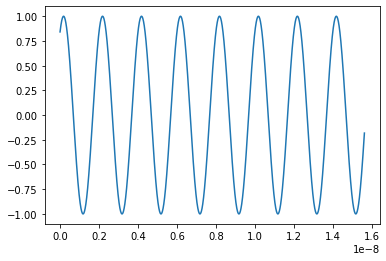

In [11]:
#Implementation of Unscented Kalman Filter

mod_y = [] # Array containing the modulated sine wave

iterations = 10000 #define number of iterations

amplitude = 1

current_time = 0

sine_phase = 1

Frequency = 500000000

mod_time = []

for i in range (iterations) :

    temp_calc = amplitude * math.sin (( 2 * math.pi * Frequency * current_time) + sine_phase)

    mod_y.append ( temp_calc )

    mod_time.append ( current_time )

    current_time =  current_time + d_time


matplot.plot ( mod_time , mod_y )



10000


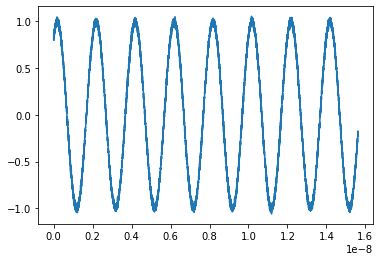

In [12]:
#Adding random noise to the function

from numpy.random import randn

mean = 0

variance = 0.021

print(iterations)

for i in range (iterations):

    mod_y[i] = mod_y[i] + ( variance * randn ()) + mean


matplot.plot ( mod_time , mod_y )

Extended Kalman Filter:
10000
current time: 0 Iterations: 0
Phase Variance :  1
actual is : 0.8535784561014184
Estimate is:  0.8414709848078965
1.0224086981714209 2.220446049250313e-16
current time: 1.5625e-12 Iterations: 1
Phase Variance :  2.220446049250313e-16
actual is : 0.7985108691419842
Estimate is:  0.8559148720790581
0.9114008782065156 1.1102230246251568e-16
current time: 3.125e-12 Iterations: 2
Phase Variance :  1.1102230246251568e-16
actual is : 0.8653884970729708
Estimate is:  0.7963391335302695
1.0255602895521783 0.0
current time: 4.6875e-12 Iterations: 3
Phase Variance :  0.0
actual is : 0.8349562473053487
Estimate is:  0.8625492265395103
0.9710258166109551 1.1102230246251565e-16
current time: 6.25e-12 Iterations: 4
Phase Variance :  1.1102230246251565e-16
actual is : 0.8102885577236715
Estimate is:  0.8363883542431901
0.9234103823079122 0.0
current time: 7.8125e-12 Iterations: 5
Phase Variance :  0.0
actual is : 0.8265197196007368
Estimate is:  0.8122237231942643
0.94791

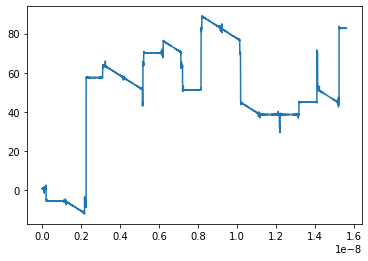

In [13]:
#Extended Kalman Filter Implementation

print("Extended Kalman Filter:")


#mod_y is the measurement with noise -> Use mod_time for sync


def gaussian_addition ( mean1 , mean2, var1, var2):

    temp = []
    temp.append ( mean1 + mean2)
    temp.append ( var1 + var2)

    return temp

def gaussian_mul ( mean1, mean2, var1, var2):

    temp = []
    temp.append ( ((var1*mean2)+(var2*mean1))/(var1+var2) )
    temp.append( (var1*var2)/(var1+var2))

    return temp

def predict ( pre_measure , current_time,  phase_variance,  noise_variance):

   # F = 1 / ( math.sqrt ( 1 - (pre_measure * pre_measure)))

    new_measure = pre_measure
 
    P = noise_variance + phase_variance

    print("Phase Variance : ", phase_variance)

    return ( new_measure, P)

def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + new_measure )
    y = actual_measure - h_x
    print("actual is :",actual_measure)
    print("Estimate is: ", h_x)

    #H calc

    H = math.cos( w + new_measure )
    H_2 = H*H

    HPH = H_2 * P
    HPHR = HPH + measurement_variance
    K = (P * H ) / HPHR
    x = new_measure + ( K * y )

    P = ( 1 - K*H ) * P
    print(x,P)

    return ( x, P )


#EKF For loop
#def predict ( pre_measure , current_time, phase_variance,  noise_variance): return ( new_measure, P)

#def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):
  #  return ( x, P )
# Declare constants

initial_phase = 1
current_time = 0
phase_var = 1
noise_var = 1
measurement_var = 0

phase_app = []
i=0

print(iterations)

while(i<iterations):

    predict_return =[]
    print("current time:", current_time,"Iterations:", i )

    phase_app.append(initial_phase)

    predict_return = predict(initial_phase, current_time,phase_var, noise_var)

    update_return = []

    update_return = update ( predict_return[0] , mod_y[i], predict_return[1], measurement_var, current_time )

    phase_var = update_return[1]

    initial_phase = update_return[0]

    current_time = current_time + d_time

    i= i + 1


matplot.plot(mod_time, phase_app)

current_time = 0
sine_new = []

i=0

for i in range (iterations):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + phase_app[i] )
    sine_new.append(h_x)
    current_time = current_time + d_time

#matplot.plot(mod_time, sine_new)
#matplot.plot(mod_time, mod_y)




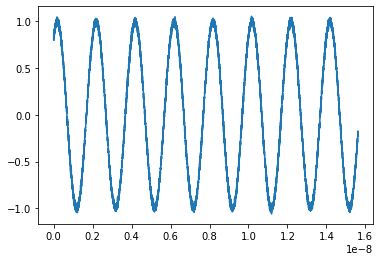

In [14]:
matplot.plot ( mod_time , mod_y )


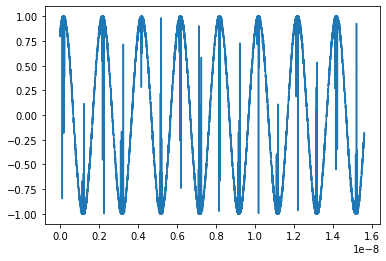

In [15]:
matplot.plot( mod_time, sine_new)

In [16]:
#Python Division testing

a = 5
b = 2

div = a//b

print(div)

if(div == 2):
    print ("Check OK")

print("Printing Phase Variance")

print(phase_var)

2
Check OK
Printing Phase Variance
0.0


Modified Extended Kalman Filter:
10000
current time: 0 Iterations: 0
actual is : 0.8535784561014184
Estimate is:  0.7833269096274834
1.0130154760377743 1.1102230246251565e-16
current time: 1.5625e-12 Iterations: 1
actual is : 0.7985108691419842
Estimate is:  0.8510197914904742
0.9130239295741267 1.1102230246251565e-16
current time: 3.125e-12 Iterations: 2
actual is : 0.8653884970729708
Estimate is:  0.79731978744253
1.0258031697875267 1.1102230246251565e-16
current time: 4.6875e-12 Iterations: 3
actual is : 0.8349562473053487
Estimate is:  0.862672091975602
0.9710031755607181 0.0
current time: 6.25e-12 Iterations: 4
actual is : 0.8102885577236715
Estimate is:  0.8363759436242331
0.9234120268365217 0.0
current time: 7.8125e-12 Iterations: 5
actual is : 0.8265197196007368
Estimate is:  0.8122246825224477
0.9479173262425739 0.0
current time: 9.375e-12 Iterations: 6
actual is : 0.828390155735424
Estimate is:  0.8290293949709369
0.9467742048388035 0.0
current time: 1.09375e-11 Iterations: 7

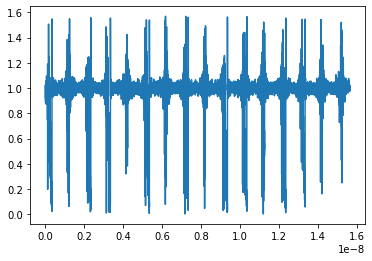

In [17]:
#Modified Extended Kalman Filter Implementation

print("Modified Extended Kalman Filter:")


#mod_y is the measurement with noise -> Use mod_time for sync


def gaussian_addition ( mean1 , mean2, var1, var2):

    temp = []
    temp.append ( mean1 + mean2)
    temp.append ( var1 + var2)

    return temp

def gaussian_mul ( mean1, mean2, var1, var2):

    temp = []
    temp.append ( ((var1*mean2)+(var2*mean1))/(var1+var2) )
    temp.append( (var1*var2)/(var1+var2))

    return temp

def predict ( pre_measure , current_time,  phase_variance,  noise_variance):

   # F = 1 / ( math.sqrt ( 1 - (pre_measure * pre_measure)))

    new_measure = pre_measure
 
    P = noise_variance + phase_variance

    return ( new_measure, P)

def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + new_measure )
    y = actual_measure - h_x
    print("actual is :",actual_measure)
    print("Estimate is: ", h_x)

    #H calc

    H = math.cos( w + new_measure )
    H_2 = H*H

    HPH = H_2 * P
    HPHR = HPH + measurement_variance
    K = (P * H ) / HPHR
    x = new_measure + ( K * y )

    P = ( 1 - K*H ) * P
    print(x,P)

    return ( x, P )


#EKF For loop
#def predict ( pre_measure , current_time, phase_variance,  noise_variance): return ( new_measure, P)

#def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):
  #  return ( x, P )
# Declare constants

initial_phase = 0.9
current_time = 0
phase_var = 0
noise_var = 1
measurement_var = 0

phase_app = []
i=0

print(iterations)

while(i<iterations):

    predict_return =[]
    print("current time:", current_time,"Iterations:", i )

    phase_app.append(initial_phase)

    predict_return = predict(initial_phase, current_time,phase_var, noise_var)

    update_return = []

    update_return = update ( predict_return[0] , mod_y[i], predict_return[1], measurement_var, current_time )

    phase_var = update_return[1]

    quotient = update_return[0] // 1.57

    initial_phase = update_return[0] - ( quotient * 1.57 )

    #initial_phase = update_return[0]

    current_time = current_time + d_time

    i= i + 1


matplot.plot(mod_time, phase_app)

current_time = 0
sine_new = []

i=0

for i in range (iterations):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + phase_app[i] )
    sine_new.append(h_x)
    current_time = current_time + d_time

#matplot.plot(mod_time, sine_new)
#matplot.plot(mod_time, mod_y)




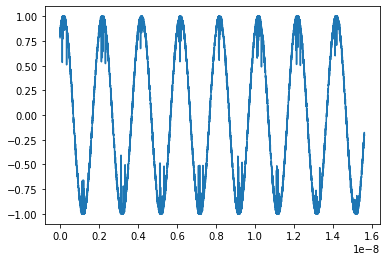

In [18]:
matplot.plot( mod_time, sine_new)

In [19]:
error = []

t= 0
ff= 0

for i in range (iterations):

    if (phase_app[i] > 0.999 and phase_app[i] < 1.0001 and ff == 0):
        print("iter:", i, "Value:",phase_app[i])
        t = 1
    
        error.append(1 - phase_app[i])
    elif (t == 1):
        ff = 1
    

iter_error = error.__len__()

error_tot = 0

for i in range (iter_error):

    error_tot = error_tot + error[i]

error_tot = error_tot/iter_error

print(error_tot)




    

iter: 15 Value: 0.9998283747456739
0.0001716252543261243


In [20]:
# This is to calculate keyrates

theta = 0.0001755817966223594


rotation_matrix = np.matrix ( [[1,0,0,0],[0,1,0,0],[0,0,math.cos(theta),math.sin(theta)],[0,0,(1)*(math.sin(theta)), math.cos(theta)]])

print("Rotation Matrix:",rotation_matrix)

v_mod = 2.670940

A = v_mod+1

T = 0.63095

B = math.sqrt (T * ( (v_mod*v_mod) + (2*v_mod)) )
      
C = ( T*v_mod + 1)

print("Initial Values check")

print("A:", A,"B:",B,"C:",C)

A_mat = ( [ [A,0], [0,A] ])

B_mat = ( [ [ C, 0] , [ 0 , C*(1-(2*(math.sin(theta)*math.sin(theta))))] ])

C_mat = ( [ [ B*math.cos(theta) , ( (-1) * B *  math.sin (theta)) ] , [ ( (-1) * B *  math.sin(theta)), ( (-1) * B * math.cos(theta))] ] )


print ("A_mat: " , A_mat)

print ( "B_mat:", B_mat)

print( "C_mat: " , C_mat)

V_mat = ( [ [ A , 0 ,  B*math.cos(theta) , ( (-1) * B *  math.sin (theta)) ] , [ 0, A ,( (-1) * B *  math.sin(theta)), ( (-1) * B * math.cos(theta)) ] , [B*math.cos(theta) , ( (-1) * B *  math.sin (theta)) , C, 0 ], [ ( (-1) * B *  math.sin(theta)), ( (-1) * B * math.cos(theta)),0 , C*(1-(2*(math.sin(theta)*math.sin(theta)))) ]])

print ( "V_mat : ", V_mat)


Rotation Matrix: [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.99999985e-01 1.75581796e-04]
 [0.00000000e+00 0.00000000e+00 1.75581796e-04 9.99999985e-01]]
Initial Values check
A: 3.67094 B: 2.805638307966196 C: 2.685229593
A_mat:  [[3.67094, 0], [0, 3.67094]]
B_mat: [[2.685229593, 0], [0, 2.6852294274342907]]
C_mat:  [[2.8056382647187306, -0.0004926190122540653], [-0.0004926190122540653, -2.8056382647187306]]
V_mat :  [[3.67094, 0, 2.8056382647187306, -0.0004926190122540653], [0, 3.67094, -0.0004926190122540653, -2.8056382647187306], [2.8056382647187306, -0.0004926190122540653, 2.685229593, 0], [-0.0004926190122540653, -2.8056382647187306, 0, 2.6852294274342907]]


In [ ]:
#Next steps in calculation

A_det = np.linalg.det ( A_mat )

B_det = np.linalg.det ( B_mat )

C_det = np.linalg.det ( C_mat )

V_det = np.linalg.det ( V_mat )
print ( " Calculated Determinants :" , A_det , B_det , C_det, V_det )

comp_delta = A_det + B_det + ( 2 * C_det) 

sq_temp = math.sqrt ( ( comp_delta * comp_delta ) - ( 4 * V_det ))

print("sq_temp:" , sq_temp)

delta_plus = math.sqrt ( ( comp_delta + sq_temp ) / 2)
delta_minus = math.sqrt  ( ( comp_delta - sq_temp) / 2)

print (delta_minus, delta_plus )

print ( "x_plus ")

print ( (delta_minus+1) /2 ) 
print ( (delta_minus-1)/2)

print ( "xminus") 

print ( (delta_plus+1)/2)
print ((delta_plus -1 )/2 )

A_dash = A - ( ( B**2 * math.cos(theta)**2)/(1+C) + ( B**2 * math.sin(theta)**2)/(C*(1-2*(math.sin(theta)**2))+1)) **2

print ("A_dash:", A_dash)

B_dash = A - ( ( B**2 * math.sin(theta)**2)/(1+C) + ( B**2 * math.cos(theta)**2)/(C*(1-2*(math.sin(theta)**2))+1)) ** 2

print ( "B_dash : ", B_dash)

C_dash = ( ( (-1) * (B**2) * math.sin(theta)* math.sin(theta))/(1+C) + ( (B**2) * math.cos(theta)* math.sin(theta))/(C*(1-2*(math.sin(theta)**2))+1)) **2

print ( "C_dash:" , C_dash)

y_cal = ( ( A_dash + B_dash ) ** 2 ) - ( 4* (C_dash **2))

y_minus = ( math.sqrt (y_cal) - ( (B_dash -A_dash)/2 ))
y_plus =  ( math.sqrt (y_cal) + ( (B_dash -A_dash)/2 ))

print ( " Y_values are " , y_minus, "and" , y_plus )

print("IAB")
print ( ( ( T /2 ) * v_mod + 1 )* ( ( 1 - ( 2 * ( math.sin(theta) ** 2) ) )/2 ) )

 Calculated Determinants : 13.475800483599999 7.210457522541003 -7.871606315127422 3.9430446135894845
sq_temp: 2.94304589391868
0.9999998704918613 1.9857103602747355
x_plus 
0.9999999352459307
-6.475406932882066e-08
xminus
1.4928551801373677
0.49285518013736773
A_dash: -0.8915048836362853
B_dash :  -0.8915052935887244
C_dash: 1.40606082263199e-07
 Y_values are  1.7830103822012071 and 1.783009972248768
IAB
0.9213073414440892


In [ ]:
new = (1.7830103822012071+1)/2 
new_2 = (1.7830103822012071-1)/2

v= ( new*math.log2(new) )-(new_2*math.log2(new_2))

print ( v )

1.1929218525465894


In [ ]:
print ( "x_plus ")

print ( (delta_minus+1) /2 ) 
print ( (delta_minus-1)/2)

print ("ANS")

print ( ((delta_minus+1) /2 )*(math.log2((delta_minus+1) /2 )) - ((delta_minus-1) /2 )*(math.log2((-1)*(delta_minus-1) /2 )) )
g_1 =  ((delta_minus+1) /2 )*(math.log2((delta_minus+1) /2 )) - ((delta_minus-1) /2 )*(math.log2((-1)*(delta_minus-1) /2 )) 

print ( "xminus") 

print ( (delta_plus+1)/2)
print ((delta_plus -1 )/2 )

print ("ANS")

print ( ((delta_plus+1) /2 )*(math.log2((delta_plus+1) /2 )) - ((delta_plus-1) /2 )*(math.log2((delta_plus-1) /2 )) )

g_2= ( ((delta_plus+1) /2 )*(math.log2((delta_plus+1) /2 )) - ((delta_plus-1) /2 )*(math.log2((delta_plus-1) /2 )) )

print ("HE")
ans = g_1 + g_2

print(ans)

x_plus 
0.9999999352459307
-6.475406932882066e-08
ANS
-1.6397769391445718e-06
xminus
1.4928551801373677
0.49285518013736773
ANS
1.3660700670383283
HE
1.3660684272613892


In [ ]:

W = ( 1 / ( 1 - T )) + 1
print(T)
print(W)

V = v_mod + 1

a = ( (-1*T*V) + (W*V) + V + (T*W) ) / ( (T*V) - (T*W) + W + 1)

c= ( (math.sqrt(T)*(V+1)) * (math.sqrt(((W**2)-1))))/ ( (T*(V-W)) + W + 1)

b = ( (V*W*T) +W -T + 1) / ((T*V) -(T*W)+W+1)

print ( a, b,c)

z = math.sqrt ( (a+b)**2 + (4*(c**2)))

v = 1/2 * ( z - (b-a))

print (v)


0.63095
3.7096599376778214
3.69529583398942 2.7044456052330843 2.8289355506113028
4.7664962881866675


In [49]:
#New Method for secret key rate calculation
import math as math

error_phase = 0.0001755817966223594    #Add phase noise here

Va = 2.5 # Enter Va here

V = Va + 1 

V_drift = 0.1

error_phase = V_drift + error_phase

e_phase = 2*Va*(1-math.exp(((-1)*(error_phase))/2))

print ( 'e_phase: ', e_phase)





att = 0.2

km = 20

r_eff = 0.5

vele = 0.1

atte = att * km

T = 10 ** (((-1)*atte)/10)

print ( T )

x_line = ( 1/(T- 1)) + e_phase

print ("x_line", x_line)

x_ohm = ( 1 - r_eff + vele )/r_eff

x_tot = x_line + (x_ohm)/T

a = V

b = T* ( V+ x_line)

c = math.sqrt( T*( V**2 -1 ))

A = a**2 + b**2 - ( 2 * c**2 )

B = ( (a*b) - c**2 )**2

print ( a, b, c)

print( A, B)

C_cal = ( ( A * x_ohm ) + ( a * math.sqrt(B)) + b) / ( b + x_ohm )


D = math.sqrt(B)* (   ( a + ( math.sqrt(B)*x_ohm) )/ (b+x_ohm) )

print ("C" ,C_cal, D)

#print ( A**2 - ( 4*B))

lambda_1 = math.sqrt ( 1/2 * ( A + math.sqrt ((A**2 - ( 4*B)))))

lambda_2 =math.sqrt( 1/2 * ( A - math.sqrt ( A**2 - ( 4*B))))

lambda_3 = math.sqrt(1/2*( C_cal + math.sqrt ( C_cal**2 - ( 4 * D ))))

lambda_4 = math.sqrt(1/2*( C_cal - math.sqrt ( C_cal**2 - ( 4 * D ))))

lambda_5 = 1

print ( lambda_1, lambda_2, lambda_3, lambda_4)

def function_g ( x ):

    print('x:', x)

    result = ( ( x + 1 )*math.log2(x+1) ) - ( x * math.log2(abs(x)) )

    return result

g_1 = function_g ( (lambda_1-1)/2)
g_2 = function_g ( (lambda_2-1)/2)
g_3 = function_g ( ( lambda_3-1)/2)
g_4 = function_g ( abs(( lambda_4-1)/2))
#g_5 = function_g(0.5*(lambda_5-1))

print ( g_1, g_2, g_3, g_4)

g = g_1 +g_2 - g_3 - g_4 

calc_temp = (V+x_tot)/(1+x_tot)

print(calc_temp)

I_AB = 0.5*math.log2(abs(calc_temp))

betta = 0.95

K = (betta*I_AB) - g

print(K)

e_phase:  0.244270405596963
0.3981071705534972
x_line -1.417154936385586
3.5 0.8291955549768533 2.1162952697406956
3.980153930939684 2.4854191769992293
C 5.481583348091284 4.189013367207743
1.7901305695287704 0.8806738754943761 2.136277378531473 0.958072184162541
x: 0.3950652847643852
x: -0.05966306225281193
x: 0.5681386892657365
x: 0.020963907918729485
1.1994184796227083 -0.3261059476490969 1.4812275460593687 0.1474530264920224
1.962608889500349
1.2174350730094017


In [ ]:
#New Method for secret key rate calculation
import math as math

def function_key ( error_phase ):

    #error_phase = 0.0001755817966223594    #Add phase noise here

    Va = 2.5 # Enter Va here

    V = Va + 1 

    e_phase = 2*Va*(1-math.exp(((-1)*(error_phase))/2))

    #V_drift = 0.2

    #e_phase = V_drift + e_phase

    att = 0.2

    km = 20

    r_eff = 0.5

    vele = 0.1

    atte = att * km

    T = 10 ** (((-1)*atte)/10)

    print ( T )

    x_line = ( 1/T ) - 1 + e_phase

    print ("x_line", x_line)

    x_ohm = ( 1 - r_eff + vele )/r_eff

    x_tot = x_line + (x_ohm)/T

    a = V

    b = T* ( V+ x_line)

    c = math.sqrt( T*( V**2 -1 ))

    A = a**2 + b**2 - ( 2 * c**2 )

    B = ( (a*b) - c**2 )**2

    print ( a, b, c)

    print( A, B)

    C_cal = ( ( A * x_ohm ) + ( a * math.sqrt(B)) + b) / ( b + x_ohm )


    D = math.sqrt(B)* (   ( a + ( math.sqrt(B)*x_ohm) )/ (b+x_ohm) )

    print ("C" ,C_cal, D)

    #print ( A**2 - ( 4*B))

    lambda_1 = math.sqrt ( 1/2 * ( A + math.sqrt ((A**2 - ( 4*B)))))

    lambda_2 =math.sqrt( 1/2 * ( A - math.sqrt ( A**2 - ( 4*B))))

    lambda_3 = math.sqrt(1/2*( C_cal + math.sqrt ( C_cal**2 - ( 4 * D ))))

    lambda_4 = math.sqrt(1/2*( C_cal - math.sqrt ( C_cal**2 - ( 4 * D ))))

    lambda_5 = 1

    print ( lambda_1, lambda_2, lambda_3, lambda_4)

    def function_g ( x ):

        result = ( ( x + 1 )*math.log2(x+1) ) - ( x * math.log2(x) )

        return result

    g_1 = function_g ( (lambda_1-1)/2)
    g_2 = function_g ( (lambda_2-1)/2)
    g_3 = function_g ( ( lambda_3-1)/2)
    g_4 = function_g ( abs(( lambda_4-1)/2))
    #g_5 = function_g(0.5*(lambda_5-1))

    print ( g_1, g_2, g_3, g_4)

    g = g_1 +g_2 - g_3 - g_4 

    calc_temp = (V+x_tot)/(1+x_tot)

    print(calc_temp)

    I_AB = 0.5*math.log2(abs(calc_temp))

    betta = 0.95

    K = (betta*I_AB) - g

    print("VDRIFT:",V_drift,"G:",K)

function_key(0.000178)
function_key(0.1)
function_key(0.15)
function_key(0.2)
function_key(0.3)
function_key(0.4)


0.3981071705534972
x_line 1.562325366733596
3.5 2.015348028171507 2.1162952697406956
7.354216337201093 6.630689014002668
C 6.174433051547372 5.2776154160239654
2.5103928113586322 1.0257408395301393 2.269265792758896 1.0123565643397145
1.7304864931580528 0.09951069546656278 1.5752231011647089 0.05428066403347562
1.448302710150991
VDRIFT: 0.05 G: 0.05332908328699895
0.3981071705534972
x_line 1.612325366733596
3.5 2.0352533866991815 2.1162952697406956
7.434845010616803 6.994338568813526
C 6.24787277221073 5.455396631886236
2.515923654976564 1.0511770416757449 2.280009652931225 1.0244162995341128
1.7338470513039934 0.17270606831016558 1.5825356499609904 0.09531485296288371
1.444318922607465
VDRIFT: 0.1 G: 0.02323232049223578
0.3981071705534972
x_line 1.6623253667335958
3.5 2.0551587452268567 2.1162952697406956
7.5162661306287415 7.367695594428218
C 6.320706454220098 5.6345821931706315
2.5213762973353235 1.0765350425621802 2.2905889306707117 1.0362957130611434
1.7371519884783377 0.236404861

0.7943282347242815
x_line 0.259370391992255
3.5 2.9861740471459384 2.989346524016272
3.2948501585516183 2.2964872423112754
C 2.9248549952252363 1.9253242782721103
1.5144585230452088 1.000632570191148 1.3872084572860113 1.0002538134190744
0.919076681427452 0.004133659583064966 0.7633695749871462 0.0018257726432405386
1.902500722092238
0.7943282347242815
x_line 0.35938289086418074
3.5 3.065616798825239 2.989346524016272
3.7756210759431745 3.216520849991956
C 3.252400364964437 2.376433946462955
1.5738928744888545 1.1395096733140906 1.4642326473457148 1.0528167549062832
0.985219351626353 0.37203356148361183 0.8601253095701547 0.17705337352269446
1.8710517967989513
0.6309573444801932
x_line 0.5853381726592011
3.5 2.5776741247246147 2.6642578939363535
4.6978636424704625 3.7001958379088884
C 3.9568455592362 2.957586394584541
1.9227581504735196 1.0004322751981327 1.7194379603360623 1.0001893119762686
1.3147450278531707 0.002943494371723468 1.1333812912537997 0.0014018277355785486
1.71690549104

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x720 with 0 Axes>

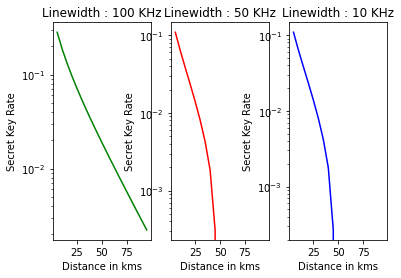

In [69]:
#New Method for secret key rate calculation
import math as math
import matplotlib.pyplot as matplot

rate = []

dist_km = []

rate_2 = []
rate_3 = []

def function_dist ( km ):

    error_phase = 0.000178    #Add phase noise here

    dist_km.append(km)

    Va = 2.5 # Enter Va here

    V = Va + 1 

    e_phase = 2*Va*(1-math.exp(((-1)*(error_phase))/2))

    V_drift = 0.1

   # e_phase = V_drift + e_phase

    att = 0.2

    #km = 20

    r_eff = 0.5

    vele = 0.1

    atte = att * km

    T = 10 ** (((-1)*atte)/10)

    print ( T )

    x_line = ( 1/T ) - 1 + e_phase

    print ("x_line", x_line)

    x_ohm = ( 1 - r_eff + vele )/r_eff

    x_tot = x_line + (x_ohm)/T

    a = V

    b = T* ( V+ x_line)

    c = math.sqrt( T*( V**2 -1 ))

    A = a**2 + b**2 - ( 2 * c**2 )

    B = ( (a*b) - c**2 )**2

    print ( a, b, c)

    print( A, B)

    C_cal = ( ( A * x_ohm ) + ( a * math.sqrt(B)) + b) / ( b + x_ohm )


    D = math.sqrt(B)* (   ( a + ( math.sqrt(B)*x_ohm) )/ (b+x_ohm) )

    print ("C" ,C_cal, D)

    #print ( A**2 - ( 4*B))

    lambda_1 = math.sqrt ( 1/2 * ( A + math.sqrt ((A**2 - ( 4*B)))))

    lambda_2 =math.sqrt( 1/2 * ( A - math.sqrt ( A**2 - ( 4*B))))

    lambda_3 = math.sqrt(1/2*( C_cal + math.sqrt ( C_cal**2 - ( 4 * D ))))

    lambda_4 = math.sqrt(1/2*( C_cal - math.sqrt ( C_cal**2 - ( 4 * D ))))

    lambda_5 = 1

    print ( lambda_1, lambda_2, lambda_3, lambda_4)

    def function_g ( x ):

        result = ( ( x + 1 )*math.log2(x+1) ) - ( x * math.log2(x) )

        return result

    g_1 = function_g ( (lambda_1-1)/2)
    g_2 = function_g ( (lambda_2-1)/2)
    g_3 = function_g ( ( lambda_3-1)/2)
    g_4 = function_g ( abs(( lambda_4-1)/2))
    #g_5 = function_g(0.5*(lambda_5-1))

    print ( g_1, g_2, g_3, g_4)

    g = g_1 +g_2 - g_3 - g_4 

    calc_temp = (V+x_tot)/(1+x_tot)

    print(calc_temp)

    I_AB = 0.5*math.log2(abs(calc_temp))

    betta = 0.95

    K = (betta*I_AB) - g

    rate.append(K)

def function_dist_2 ( km ):

    error_phase = 0.000183   #Add phase noise here

    #dist_km.append(km)

    Va = 2.5 # Enter Va here

    V = Va + 1 

    e_phase = 2*Va*(1-math.exp(((-1)*(error_phase))/2))

    V_drift = 0.1

    e_phase = V_drift + e_phase

    att = 0.2

    #km = 20

    r_eff = 0.5

    vele = 0.1

    atte = att * km

    T = 10 ** (((-1)*atte)/10)

    print ( T )

    x_line = ( 1/T ) - 1 + e_phase

    print ("x_line", x_line)

    x_ohm = ( 1 - r_eff + vele )/r_eff

    x_tot = x_line + (x_ohm)/T

    a = V

    b = T* ( V+ x_line)

    c = math.sqrt( T*( V**2 -1 ))

    A = a**2 + b**2 - ( 2 * c**2 )

    B = ( (a*b) - c**2 )**2

    print ( a, b, c)

    print( A, B)

    C_cal = ( ( A * x_ohm ) + ( a * math.sqrt(B)) + b) / ( b + x_ohm )


    D = math.sqrt(B)* (   ( a + ( math.sqrt(B)*x_ohm) )/ (b+x_ohm) )

    print ("C" ,C_cal, D)

    #print ( A**2 - ( 4*B))

    lambda_1 = math.sqrt ( 1/2 * ( A + math.sqrt ((A**2 - ( 4*B)))))

    lambda_2 =math.sqrt( 1/2 * ( A - math.sqrt ( A**2 - ( 4*B))))

    lambda_3 = math.sqrt(1/2*( C_cal + math.sqrt ( C_cal**2 - ( 4 * D ))))

    lambda_4 = math.sqrt(1/2*( C_cal - math.sqrt ( C_cal**2 - ( 4 * D ))))

    lambda_5 = 1

    print ( lambda_1, lambda_2, lambda_3, lambda_4)

    def function_g ( x ):

        result = ( ( x + 1 )*math.log2(x+1) ) - ( x * math.log2(x) )

        return result

    g_1 = function_g ( (lambda_1-1)/2)
    g_2 = function_g ( (lambda_2-1)/2)
    g_3 = function_g ( ( lambda_3-1)/2)
    g_4 = function_g ( abs(( lambda_4-1)/2))
    #g_5 = function_g(0.5*(lambda_5-1))

    print ( g_1, g_2, g_3, g_4)

    g = g_1 +g_2 - g_3 - g_4 

    calc_temp = (V+x_tot)/(1+x_tot)

    print(calc_temp)

    I_AB = 0.5*math.log2(abs(calc_temp))

    betta = 0.95

    K = (betta*I_AB) - g

    rate_2.append(K)

def function_dist_3 ( km ):

    error_phase = 0.000273    #Add phase noise here

    #dist_km.append(km)

    Va = 2.5 # Enter Va here

    V = Va + 1 

    e_phase = 2*Va*(1-math.exp(((-1)*(error_phase))/2))

    V_drift = 0.1

    e_phase = V_drift + e_phase

    att = 0.2

    #km = 20

    r_eff = 0.5

    vele = 0.1

    atte = att * km

    T = 10 ** (((-1)*atte)/10)

    #print ( T )

    x_line = ( 1/T ) - 1 + e_phase

    #print ("x_line", x_line)

    x_ohm = ( 1 - r_eff + vele )/r_eff

    x_tot = x_line + (x_ohm)/T

    a = V

    b = T* ( V+ x_line)

    c = math.sqrt( T*( V**2 -1 ))

    A = a**2 + b**2 - ( 2 * c**2 )

    B = ( (a*b) - c**2 )**2

    #print ( a, b, c)

    #print( A, B)

    C_cal = ( ( A * x_ohm ) + ( a * math.sqrt(B)) + b) / ( b + x_ohm )


    D = math.sqrt(B)* (   ( a + ( math.sqrt(B)*x_ohm) )/ (b+x_ohm) )

    #print ("C" ,C_cal, D)

    #print ( A**2 - ( 4*B))

    lambda_1 = math.sqrt ( 1/2 * ( A + math.sqrt ((A**2 - ( 4*B)))))

    lambda_2 =math.sqrt( 1/2 * ( A - math.sqrt ( A**2 - ( 4*B))))

    lambda_3 = math.sqrt(1/2*( C_cal + math.sqrt ( C_cal**2 - ( 4 * D ))))

    lambda_4 = math.sqrt(1/2*( C_cal - math.sqrt ( C_cal**2 - ( 4 * D ))))

    lambda_5 = 1

    #print ( lambda_1, lambda_2, lambda_3, lambda_4)

    def function_g ( x ):

        result = ( ( x + 1 )*math.log2(x+1) ) - ( x * math.log2(x) )

        return result

    g_1 = function_g ( (lambda_1-1)/2)
    g_2 = function_g ( (lambda_2-1)/2)
    g_3 = function_g ( ( lambda_3-1)/2)
    g_4 = function_g ( abs(( lambda_4-1)/2))
    #g_5 = function_g(0.5*(lambda_5-1))

    #print ( g_1, g_2, g_3, g_4)

    g = g_1 +g_2 - g_3 - g_4 

    calc_temp = (V+x_tot)/(1+x_tot)

    #print(calc_temp)

    I_AB = 0.5*math.log2(abs(calc_temp))

    betta = 0.95

    K = (betta*I_AB) - g

    rate_3.append(K)

n = 1
dist=5
while ( n != 20 ):

  function_dist (dist)
  function_dist_2 (dist)
  function_dist_3(dist)

  n = n + 1
  dist = dist + 5 


print ( len (dist_km))
print ( len ( rate))

matplot.figure(figsize=(10,10))

figure, axis = matplot.subplots(1,2)



axis[0].semilogy( dist_km, rate_2, color ='r')
axis[0].set_title ( 'Linewidth : 50 KHz')
axis[1].semilogy( dist_km, rate_3, color = 'b' )
axis[1].set_title ( 'Linewidth : 10 KHz')
axis[0].set_xlabel ( "Distance in kms")
axis[0].set_ylabel ("Secret Key Rate")
axis[1].set_xlabel ( "Distance in kms")
axis[1].set_ylabel ("Secret Key Rate")


matplot.show

0.7943282347242815
x_line 0.259370391992255
3.5 2.9861740471459384 2.989346524016272
3.2948501585516183 2.2964872423112754
C 2.908230872405062 1.908647685407992
1.5144585230452088 1.000632570191148 1.3812210944689782 1.0002295539519817
0.919076681427452 0.004133659583064966 0.7554855847287192 0.001667899639913233
1.9829075089074757
0.6309573444801932
x_line 0.5853381726592011
3.5 2.5776741247246147 2.6642578939363535
4.6978636424704625 3.7001958379088884
C 3.9197707018816925 2.92043191778528
1.9227581504735196 1.0004322751981327 1.7086328498686418 1.000172228284437
1.3147450278531707 0.002943494371723468 1.1229738907690288 0.0012870746667852633
1.7807792806228149
0.5011872336272722
x_line 0.9957072951669674
3.5 2.2531911024626794 2.374522347401012
6.050157387603356 5.052660946648923
C 4.97731260073833 3.9780927660713457
2.2471179663132794 1.0003090687759595 1.9942543821982546 1.0001310213274
1.5600215477805157 0.0021793352654232035 1.3728824986310224 0.001004976359971899
1.620212755057

<function matplotlib.pyplot.show(close=None, block=None)>

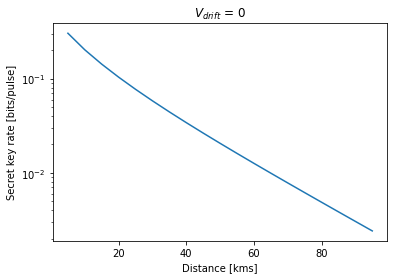

In [66]:
#New Method for secret key rate calculation
import math as math
import matplotlib.pyplot as matplot

rate = []

dist_km = []

rate_2 = []
rate_3 = []

def function_dist ( km ):

    error_phase = 0.000178    #Add phase noise here

    dist_km.append(km)

    Va = 2.5 # Enter Va here

    V = Va + 1 

    V_drift = 0

    error_phase = error_phase + V_drift

    e_phase = 2*Va*(1-math.exp(((-1)*(error_phase))/2))


   # e_phase = V_drift + e_phase

    att = 0.2

    #km = 20

    r_eff = 0.5

    vele = 0.01

    atte = att * km

    T = 10 ** (((-1)*atte)/10)

    print ( T )

    x_line = 1/T -1 + e_phase

    print ("x_line", x_line)

    x_ohm = ( 1 - r_eff + vele )/r_eff

    x_tot = x_line + (x_ohm)/T

    a = V

    b = T* ( V+ x_line)

    c = math.sqrt( T*( V**2 -1 ))

    A = a**2 + b**2 - ( 2 * c**2 )

    B = ( (a*b) - c**2 )**2

    print ( a, b, c)

    print( A, B)

    C_cal = ( ( A * x_ohm ) + ( a * math.sqrt(B)) + b) / ( b + x_ohm )


    D = math.sqrt(B)* (   ( a + ( math.sqrt(B)*x_ohm) )/ (b+x_ohm) )

    print ("C" ,C_cal, D)

    #print ( A**2 - ( 4*B))

    lambda_1 = math.sqrt ( 1/2 * ( A + math.sqrt (abs(A**2 - ( 4*B)))))

    lambda_2 =math.sqrt(abs( 1/2 * ( A - math.sqrt ( abs(A**2 - ( 4*B))))))

    lambda_3 = math.sqrt(1/2*( C_cal + math.sqrt ( abs(C_cal**2 - ( 4 * D )))))

    lambda_4 = math.sqrt(1/2*( C_cal - math.sqrt ( abs(C_cal**2 - ( 4 * D )))))

    lambda_5 = 1

    print ( lambda_1, lambda_2, lambda_3, lambda_4)

    def function_g ( x ):

        result = ( ( x + 1 )*math.log2(x+1) ) - ( x * math.log2(abs(x)) )

        return result

    g_1 = function_g ( (lambda_1-1)/2)
    g_2 = function_g ( (lambda_2-1)/2)
    g_3 = function_g ( ( lambda_3-1)/2)
    g_4 = function_g ( abs(( lambda_4-1)/2))
    #g_5 = function_g(0.5*(lambda_5-1))

    print ( g_1, g_2, g_3, g_4)

    g = g_1 +g_2 - g_3 - g_4 

    calc_temp = (V+x_tot)/(1+x_tot)

    print(calc_temp)

    I_AB = 0.5*math.log2(abs(calc_temp))

    betta = 0.95

    K = (betta*I_AB) - g

    rate.append(K)


n = 1
dist=5
while ( n != 20 ):

  function_dist (dist)

  n = n + 1
  dist = dist + 5 


print ( len (dist_km))
print ( len ( rate))

#matplot.figure(figsize=(10,10))



matplot.semilogy( dist_km, rate )
matplot.title ( '$V_{drift}$ = 0')
matplot.xlabel ('Distance [kms]')
matplot.ylabel ('Secret key rate [bits/pulse]')



matplot.show